# Minimierung Fehlklassifikationswahrscheinlichkeit

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sympy import *

In [2]:
mu1 = -4
var1 = 16

mu2 = -2
var2 = 64

# Test aus Seminar
# mu1 = 0
# mu2 = 2
# var1 = 0.5
# var2 = 0.25

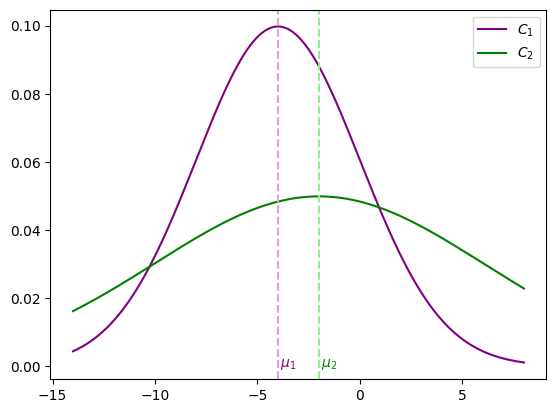

In [3]:
left_border = mu1 - 10
right_border = mu2 + 10

x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label='$C_2$')

plt.axvline(x=mu1, color='plum', linestyle='--')
plt.axvline(x=mu2, color='lightgreen', linestyle='--')

plt.annotate(r'$\mu_1$', xy=(mu1 + 0.1, 0), color='purple')
plt.annotate(r'$\mu_2$', xy=(mu2 + 0.1, 0), color='green')

plt.legend()
plt.show()

In [18]:
x = Symbol('x')

lhs = (1 / (2 * var2) - 1 / (2 * var1)) * x**2 + ((2 * mu1) / (2 * var1) - (2 * mu2) / (2 * var2)) * x + mu2**2 / (2 * var2) - mu1**2 / (2 * var1) - ln(sqrt(var1 / var2))
eqn = Eq(lhs, 0)

# ALTERNATIVE FORM (aus Opal)
# lhs = (x - mu2)**2 / var2 - (x - mu1)**2 / var1
# rhs = 2 * ln(sqrt(var1 /var2))
# eqn = Eq(lhs, rhs)

x = solveset(eqn)
print(x.n())
x = list(x)

{-10.2659574683369, 0.932624135003557}


In [5]:
print(f'R1 = ({x[0]:.4f}, {x[1]:.4f})')
print(f'R2 = (-inf, {x[0]:.4f}) + ({x[1]:.4f}, +inf)')

R1 = (-10.2660, 0.9326)
R2 = (-inf, -10.2660) + (0.9326, +inf)


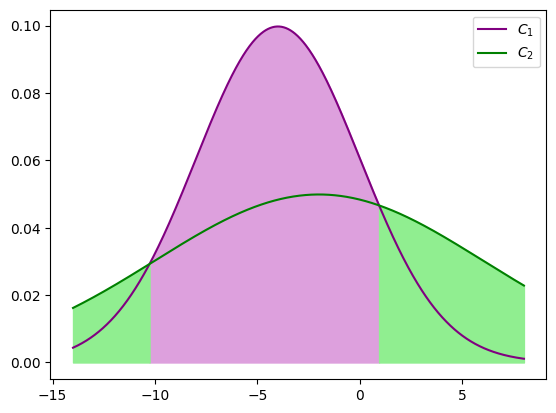

In [6]:
x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label='$C_2$')

R1 = np.linspace(float(x[0]), float(x[1]))
plt.fill_between(R1, norm.pdf(R1, mu1, np.sqrt(var1)), color='plum')

R2_1 = np.linspace(left_border, float(x[0]))
plt.fill_between(R2_1, norm.pdf(R2_1, mu2, np.sqrt(var2)), color='lightgreen')

R2_2 = np.linspace(float(x[1]), right_border)
plt.fill_between(R2_2, norm.pdf(R2_2, mu2, np.sqrt(var2)), color='lightgreen')

plt.legend()
plt.show()

## Verlustmatrix

In [7]:
L = np.array([[0, 6], [4, 0]])
# L = np.array([[0, 0.5], [1, 0]])

In [8]:
x = Symbol('x')

lhs = (1 / (2 * var2) - 1 / (2 * var1)) * x**2 + ((2 * mu1) / (2 * var1) - (2 * mu2) / (2 * var2)) * x + mu2**2 / (2 * var2) - mu1**2 / (2 * var1) - ln(L[1][0] / L[0][1] * sqrt(var1 / var2))
eqn = Eq(lhs, 0)

x = solveset(eqn)
print(x)
x = list(x)

{-11.6417582140432, 2.30842488070988}


In [9]:
print(f'R1 = ({x[0]:.4f}, {x[1]:.4f})')
print(f'R2 = (-inf, {x[0]:.4f}) + ({x[1]:.4f}, +inf)')

R1 = (-11.6418, 2.3084)
R2 = (-inf, -11.6418) + (2.3084, +inf)


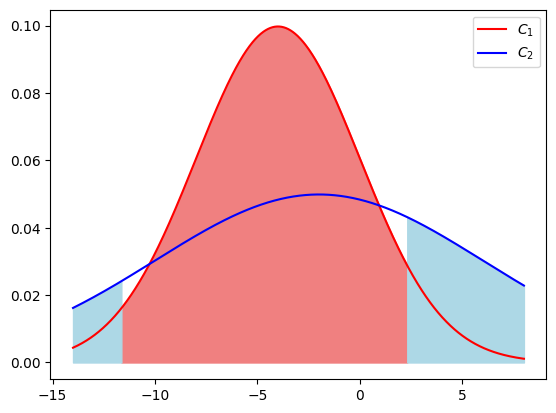

In [10]:
x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='r', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='b', label='$C_2$')

R1 = np.linspace(float(x[0]), float(x[1]))
plt.fill_between(R1, norm.pdf(R1, mu1, np.sqrt(var1)), color='lightcoral')

R2_1 = np.linspace(left_border, float(x[0]))
plt.fill_between(R2_1, norm.pdf(R2_1, mu2, np.sqrt(var2)), color='lightblue')

R2_2 = np.linspace(float(x[1]), right_border)
plt.fill_between(R2_2, norm.pdf(R2_2, mu2, np.sqrt(var2)), color='lightblue')

plt.legend()
plt.show()

## Unterschiedliche Klassenverteilung

In [11]:
p_C1 = 4/6
p_C2 = 2/6

In [12]:
x = Symbol('x')
a = (1 / (2 * var2)) - (1 / (2 * var1))
b = (2 * mu1 / (2 * var1)) - (2 * mu2 / (2 * var2))
c = (mu2**2 / (2 * var2)) - (mu1**2 / (2 * var1))
z = ln((p_C2 / p_C1) * sqrt(var1 / var2))

lhs = a * x**2 + b * x + c - z
eqn = Eq(lhs, 0)

# ALTERNATIVE FORM (Opal)
# lhs = (x - mu2)**2 / var2 - (x - mu1)**2 / var1
# rhs = 2 * ln(p_C2 / p_C1 * sqrt(var1 / var2))
# eqn = Eq(lhs, rhs)

x = solveset(eqn)
print(x)
x = list(x)

{-12.4721991395707, 3.13886580623739}


In [13]:
print(f'R1 = ({x[0]:.4f}, {x[1]:.4f})')
print(f'R2 = (-inf, {x[0]:.4f}) u ({x[1]:.4f}, +inf)')

R1 = (-12.4722, 3.1389)
R2 = (-inf, -12.4722) u (3.1389, +inf)


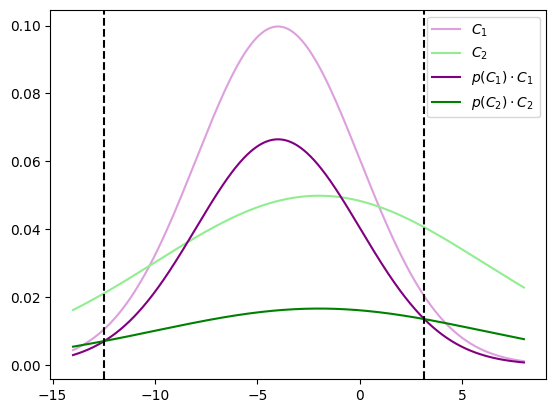

In [14]:
left_border = mu1 - 10
right_border = mu2 + 10

x_plot = np.linspace(left_border, right_border, 1000)

plt.plot(x_plot, norm.pdf(x_plot, mu1, np.sqrt(var1)), color='plum', label='$C_1$')
plt.plot(x_plot, norm.pdf(x_plot, mu2, np.sqrt(var2)), color='lightgreen', label='$C_2$')

plt.plot(x_plot, p_C1 * norm.pdf(x_plot, mu1, np.sqrt(var1)), color='purple', label=r'$p(C_1) \cdot C_1$')
plt.plot(x_plot, p_C2 * norm.pdf(x_plot, mu2, np.sqrt(var2)), color='green', label=r'$p(C_2) \cdot C_2$')

plt.axvline(x=x[0], color='black', linestyle='--')
plt.axvline(x=x[1], color='black', linestyle='--')

plt.legend()
plt.show()